In [18]:
%matplotlib notebook
import numpy as np
from check_point_manager import CheckpointManager
import matplotlib.pyplot as plt


In [19]:
def tof(l):
    return [float(x) for x in l]


In [20]:
def query(data, key):
    d_dict = {}
    for i in range(len(data)):
        l = tof(data[i][key])
        d_dict[models[i]] = l
    return key, d_dict

In [21]:
models = [
    "single_output_model_256_gru",
    "single_model_2_256",
    "multi_model_256_gru",
    "single_input_model_2_256"
]

In [26]:
data = []
for model in models:
    file = "model_weights/{0}/history.txt".format(model)
    lines = open(file).readlines()
    info = {}
    for line in lines:
        vals = line[:-1].split(',')
        vals = vals[2:]
        for val in vals:
            if val == '':
                break
            k, v = val.split(':')
            if k not in info:
                info[k] = []
            info[k].append(v)
    data.append(info)

<IPython.core.display.Javascript object>


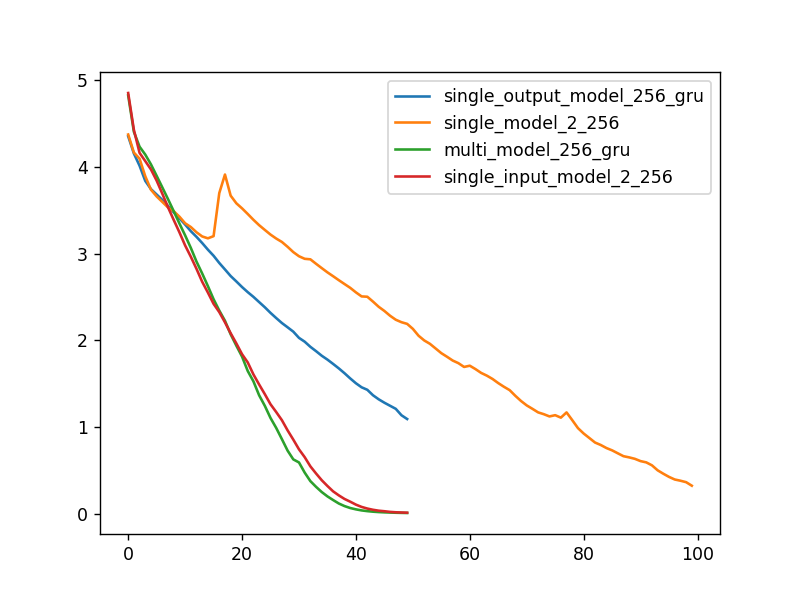

In [28]:
key, d_dict = query(data, 'loss')
for key in d_dict:
    plt.plot(d_dict[key], label=key)

plt.legend()
plt.show()